### Normalization And Standardization

#### Transformation of Features

***Why Transformation of Features Are Required?***

1. Linear Regression---Gradient Descent ----Global Minima
2. Algorithms like KNN, K Means, Hierarichal Clustering--- Eucledian Distance

Every Point has some vectors and Direction

***Deep Learning Techniques(Standardization, Scaling)***
1. ANN ---> GLobal Minima, Gradient
2. CNN
3. RNN


## Types Of Transformation

1. Normalization And Standardization

2. Scaling to Minimum And Maximum values

3. Scaling To Median And Quantiles


### 1. Standardization
We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero.
z=(x-x_mean)/std

In [45]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['Pclass','Age','Fare','Survived'])

df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [46]:
df['Age'].fillna(df.Age.median(),inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [48]:
#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

# ### fit vs fit_transform
# scaler.fit_transform(df)

##OR
columns = df.columns
df[columns] = scaler.fit_transform(df[columns])
df.head()

,Survived,Pclass,Age,Fare
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337


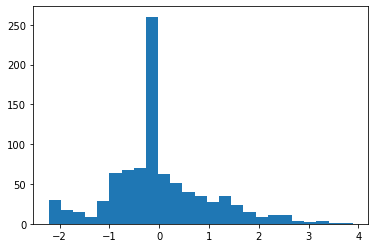

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

# plt.figure(figsize=(8,5))
plt.hist(df['Age'], bins=25)
plt.show()

### 2. Min Max Scaling  
##### (### CNN)---Deep Learning Techniques
Min Max Scaling scales the values between 0 to 1.
X_scaled = (X - X.min / (X.max - X.min)

In [54]:
import pandas as pd

df=pd.read_csv('titanic.csv', usecols=['Pclass','Age','Fare','Survived'])
df['Age'].fillna(df.Age.median(),inplace=True)
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [55]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()

column = df.columns
df[column] = min_max.fit_transform(df[column])
df.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


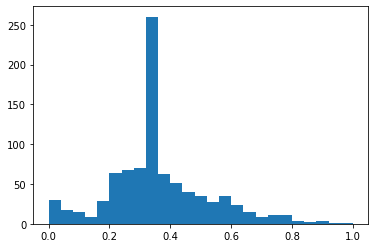

In [57]:
# plt.figure(figsize=(8,5))
plt.hist(df['Age'], bins=25)
plt.show()

### 3. Robust Scaler
It is used to scale the feature to median and quantiles
Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

***IQR = 75th quantile - 25th quantile***

X_scaled = (X - X.median) / IQR

0,1,2,3,4,5,6,7,8,9,10

9-90 percentile---90% of all values in this group is less than 9
1-10 precentile---10% of all values in this group is less than 1
4-40%

In [58]:
import pandas as pd

df=pd.read_csv('titanic.csv', usecols=['Pclass','Age','Fare','Survived'])
df['Age'].fillna(df.Age.median(),inplace=True)
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [59]:
from sklearn.preprocessing import RobustScaler

scaler=RobustScaler()
df_robust_scaler = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_robust_scaler.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


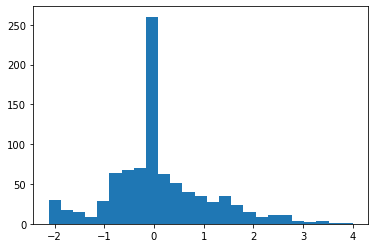

In [61]:
# plt.figure(figsize=(8,5))
plt.hist(df_robust_scaler['Age'], bins=25)
plt.show()